In [16]:
from argparse import Namespace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

引入运行所需要的库

In [17]:
#参数
args = Namespace(
    seed = 1234,
    data_file = "sample_data.csv",
    num_samples = 100,
    train_size = 0.75,
    test_size = 0.25,
    num_epochs = 100
)

#设置随机种子来保证实验结果的可重复性
np.random.seed(args.seed)

In [18]:
#生成数据
def generate_data(num_samples):
  X = np.array(range(num_samples))
  y = 3.65*X + 10
  return X, y


np.array生成数组，range()函数生成一个左闭右开的数列

In [19]:
#生成随机数据
X, y = generate_data(args.num_samples)
data = np.vstack([X,y]).T
df = pd.DataFrame(data, columns=['X','y'])
df.head(6)

,X,y
0,0.0,10.00
1,1.0,13.65
2,2.0,17.30
3,3.0,20.95
4,4.0,24.60
5,5.0,28.25




*   np.vstack()是按行添加数组，np.hstack是按列添加数组
*   .T是进行数组转置
*   pd.DataFrame（data,index,columns）是将数据转换为表格形式呈现出来,
data是待转换数据，index设置表格行号，columns设置表格列号，如果不设置则默认为1234...
*   head(n)此函数返回所选数据的前n行数据以供查看，n不设置则默认为5行





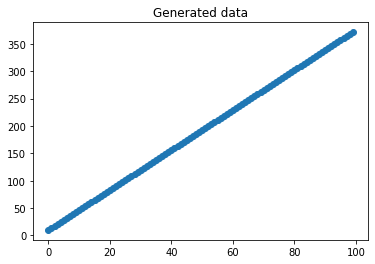

In [20]:
#散点图
plt.title('Generated data')
plt.scatter(x=df["X"], y=df["y"])
plt.show()



*   title()是给出现的图表起个标题
*   scatter(x,y,s,c...)
x,y是x轴y轴的数据，是必选的
s是数组大小，c是颜色，是可选项，此外还有很多其他可选项不一一列出



In [21]:
#导入需要的包
from sklearn.linear_model import SGDRegressor       
from sklearn.preprocessing import StandardScaler     
from sklearn.model_selection import train_test_split





*   SGDRegressor为随机梯度下降函数
*   StandardScaler为标准化函数 标准化数据通过减去均值然后除以方差（或标准差），这种数据标准化方法经过处理后数据符合标准正态分布，即均值为0，标准差为1，转化函数为：x =(x - 𝜇)/𝜎
*   train_test_split 划分数据






In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df["X"].values.reshape(-1,1), df["y"], train_size = args.train_size,
    test_size = args.test_size, random_state = args.seed )
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (75, 1)
X_test (25, 1)
y_train (75,)
y_test (25,)



*   此种形式为train_test_split的常用形式
*   data.values.reshape(-1,1)是指不管原来的数据是几行几列，重置成一列数据



In [23]:
#标准化训练集
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

#在训练集和测试集上进行标准化操作

standardized_X_train = X_scaler.transform(X_train)
standardized_X_test = X_scaler.transform(X_test)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

# 检查
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean 应该是 ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std 应该是 1


mean: [8.22952817e-17] -1.5617137213060536e-16
std: [1.] 0.9999999999999999




*   StandardScaler.fit()函数用于训练数据的均值和方差
*   StandardScaler.transform()函数用于转换数据 ，把数据转成标准的正太分布
*   实际使用中常常是fit()和transform联合使用
*   先用fit(): scaler = preprocessing.StandardScaler().fit(X)  这一步可以得到scaler，scaler里面存的有计算出来的均值和方差
*   再用transform(): scaler.transform(X)  这一步再用scaler中的均值和方差来转换X，使X标准化








In [24]:
#初始化模型
lm = SGDRegressor(loss="squared_loss", penalty="none", max_iter=args.num_epochs)



*   SGDRegressorA()函数的参数有很多，本例中涉及到的三个意义为：
*   loss:损失函数，默认为squared_loss损失函数平方误差，可选项：‘squared_loss’, ‘huber’,‘epsilon_insensitive’, or‘squared_epsilon_insensitive’

‘squared_loss’：平方误差

“huber”：修正了“squared_loss”，通过从平方转换到基于epsilon距离的线性损失，减少了对异常值的校正。

epsilon_insensitive：epsilon_insensitive’ 忽略小于 epsilon的误差。使用的是SVR的损失函数。

'squared_epsilon_insensitive：上面的平方损失
*   penelty:直译为惩罚，惩罚项，可选项：‘none’, ‘l2’, ‘l1’, or ‘elasticnet’默认为l2
*   max_iter:数据的最大训练轮数，或者说是最大迭代次数
*   alpha：常数乘以正则化项。默认值为0.0001，当设置为“最优”时，也用于计算learning_rate。不常用
*   l1_ratio：elasticnet弹性网络中l1正则项的程度
*   fit_intercept：偏置项
*   tol：容忍误差
*   shuffle：训练数据是否应该在每个epochs之后重新洗牌。默认值为True。
*   只有当huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’时可用，对于“huber”来说，它决定了一个阈值，在这个阈值内，不必准确预测。对于epsilon_insensitive’，如果当前的预测与正确的标记之间的差异小于这个阈值，则忽略它们。
*   random_state:种子生成器
*   learning_rate;学习率，可选‘constant’，‘optimal’:invscaling’，‘adaptive’
*   adaptive:自适应改变eta
*   eta0:学习率，在‘constant’，‘’invscaling’，‘adaptive’下可用
*   power_t:逆标度学习速率的指数
*   early_stopping:当验证分数没有提高时，是否使用早期停止终止训练
*   validation_fraction：训练集留给验证集的部分，（0,1）直接，且early_stopping设为True
*   n_iter_no_change；在early stopping前没有提高性能的迭代次数
*   warm_start：是否重新开始
*   average：当设置为True时，计算SGD的平均权重，并将结果存储在coef_属性中









In [25]:
#训练
lm.fit(X=standardized_X_train, y=standardized_y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='none', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

上面这处显示的就是SGDRegressor的全部参数

In [29]:
#预测，还未标准化
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

Standardized.fit()函数训练之后就自带以下参数：

scale_： 缩放比例，同时也是标准差

mean_： 每个特征的平均值

var_:每个特征的方差

n_sample_seen_:样本数量，可以通过patial_fit 增加

如上面的y_scaler.mean_, y_scaler.var_,还有y_scaler.scale_等

In [30]:
import matplotlib.pyplot as plt

#训练和测试集上的均方误差
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print("train_mse: {0:.2f}, test_mse: {1:.2f}".format(train_mse, test_mse))


train_mse: 22.63, test_mse: 24.03


In [31]:
# 传入我们自己的输入值
X_infer = np.array((0, 1, 2), dtype=np.float32)
standardized_X_infer = X_scaler.transform(X_infer.reshape(-1, 1))
pred_infer = (lm.predict(standardized_X_infer) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
print (pred_infer)
df.head(3)

[17.61965046 21.10466106 24.58967167]


,X,y
0,0.0,10.00
1,1.0,13.65
2,2.0,17.30
